# Kaggle Titanic

https://www.kaggle.com/c/titanic

## dataset description

Variable | Definition | Key
---------|------------|-----
Survival | survival | 0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	
Age | Age in years
sibsp |	# of siblings / spouses aboard the Titanic	
parch | # of parents / children aboard the Titanic	
ticket | Ticket number	
fare	| Passenger fare	
cabin	| Cabin number	
embarked	| Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass:** A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
# from statistics import mode


%matplotlib inline

# init data

In [ ]:
import memory_usage

Reducing the memory usage of dataframe.
https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

In [ ]:
link = 'D:\STUDY\practice\\titanic'
train = 'train.csv'
test = 'test.csv'

In [ ]:
df = pd.read_csv(link+'\\'+train)
#df = memory_usage.import_data(link+'\\'+train)
test_df = memory_usage.import_data(link+'\\'+test)

df = df.rename(columns={c:str.lower(c) for c in df.columns})
test_df = test_df.rename(columns={c:str.lower(c) for c in test_df.columns})

# eda

## basic info

In [9]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [13]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.median()

passengerid    446.0000
survived         0.0000
pclass           3.0000
age             28.0000
sibsp            0.0000
parch            0.0000
fare            14.4542
dtype: float64

## basic contributions

distributions
- [ ] survived
- [ ] pclass
- [ ] sex
- [ ] sibsp
- [ ] parch
- [ ] embarked

boxplots
- [ ] age
- [ ] fare

In [15]:

def percent_merge(df, group, title):
    '''
    визуализирует и приводит таблицу с распределением в разрезе переменной group с процентным соотношением
    '''
    plt.figure(figsize=(15, 3))
    sns.countplot(y=group, data=df, palette='GnBu')
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig('./img/basic_dist_'+title+'.png')
    plt.show()
    return df[group].value_counts().to_frame(group).merge(
                                                          (df[group].value_counts()/df.shape[0]).round(3).to_frame('percent'),
                                                           how='left', left_index=True, right_index=True
                                                           ).sort_index()

- [X] survived

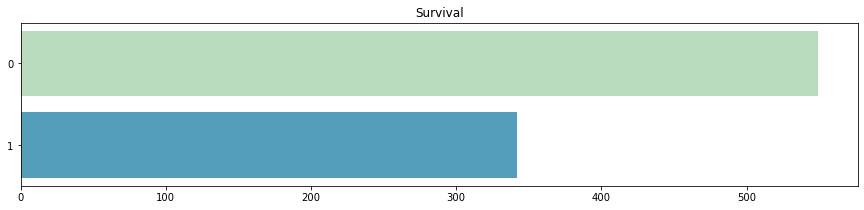

,survived,percent
0,549,0.616
1,342,0.384


In [16]:
percent_merge(df,'survived', 'Survival')

- [X] pclass

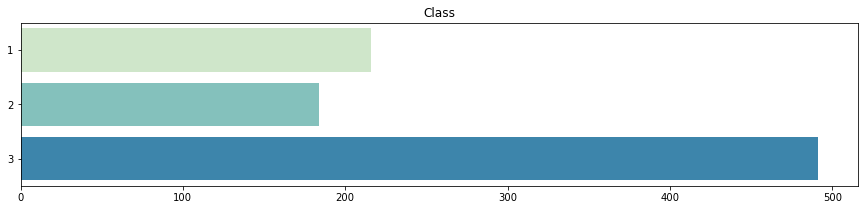

,pclass,percent
1,216,0.242
2,184,0.207
3,491,0.551


In [17]:
percent_merge(df,'pclass', 'Class')

- [X] sex

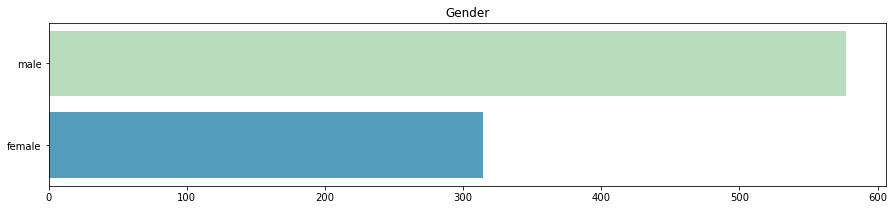

,sex,percent
female,314,0.352
male,577,0.648


In [18]:
percent_merge(df, 'sex', 'Gender')

- [X] sibsp

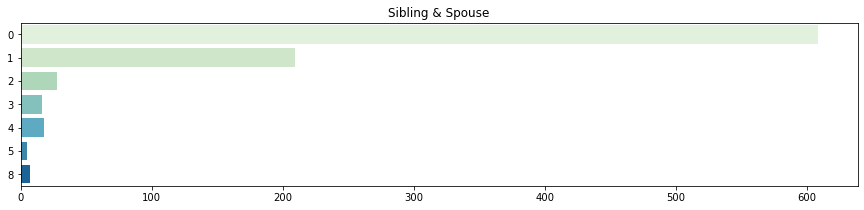

,sibsp,percent
0,608,0.682
1,209,0.235
2,28,0.031
3,16,0.018
4,18,0.020
5,5,0.006
8,7,0.008


In [19]:
percent_merge(df,'sibsp', 'Sibling & Spouse')

- [X] parch

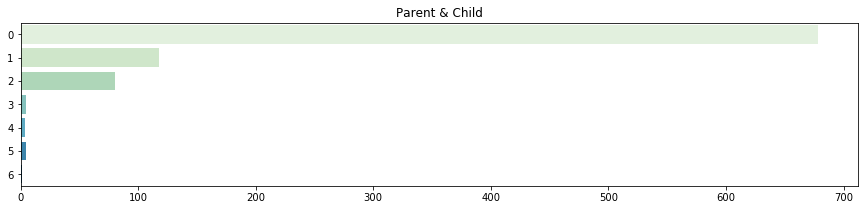

,parch,percent
0,678,0.761
1,118,0.132
2,80,0.090
3,5,0.006
4,4,0.004
5,5,0.006
6,1,0.001


In [20]:
percent_merge(df,'parch', 'Parent & Child')

- [X] embarked

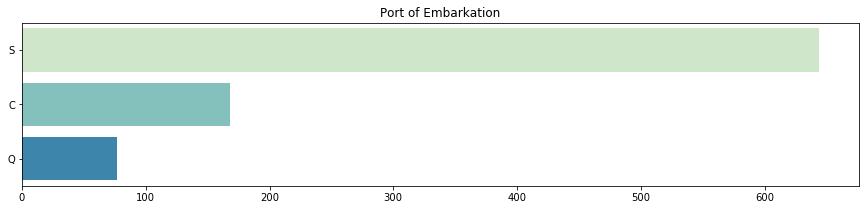

,embarked,percent
C,168,0.189
Q,77,0.086
S,644,0.723


In [21]:
percent_merge(df,'embarked', 'Port of Embarkation')

- [X] age

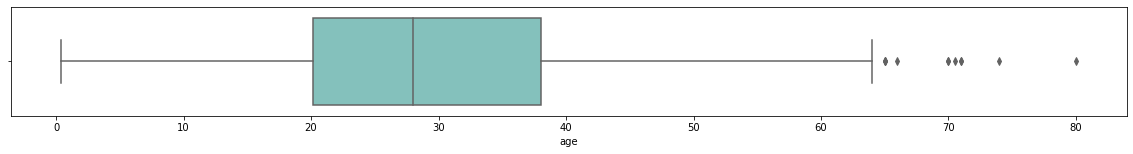

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [22]:
plt.figure(figsize=(20, 2))
sns.boxplot(x='age', data = df, palette='GnBu')
plt.show()
df[['age']].describe()

- [X] fare

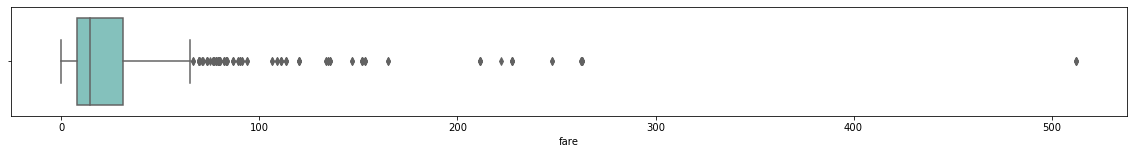

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [23]:
plt.figure(figsize=(20, 2))
sns.boxplot(x='fare', data = df[['fare']], palette='GnBu')
plt.show()
df[['fare']].describe()

распределения
- [X] survived
- [X] pclass
- [X] sex
- [X] sibsp
- [X] parch
- [X] embarked

боксплот
- [X] age
- [X] fare

## survived

In [24]:

def survived(df, group, title):
    '''
    визуализирует и приводит таблицу с распределением в разрезе переменной group с процентным соотношением
    '''
    plt.figure(figsize=(15, 3))
    sns.countplot(y=group, hue='survived', data=df, palette='GnBu').legend(loc='lower right')
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig('./img/'+title+'.png')
    plt.show()


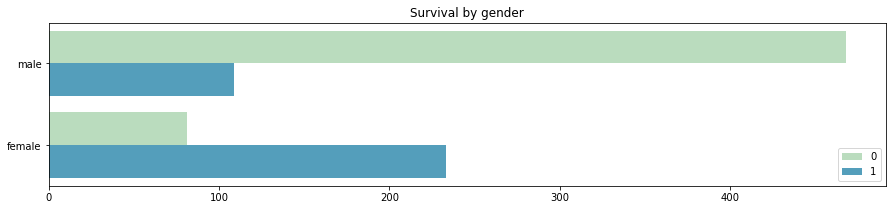

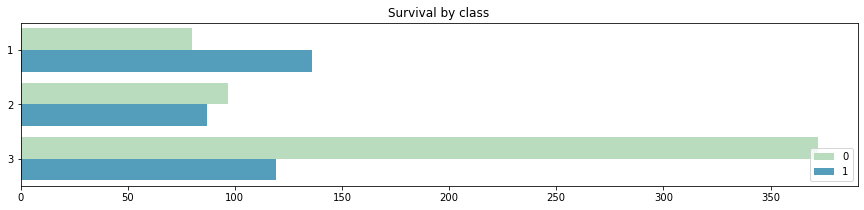

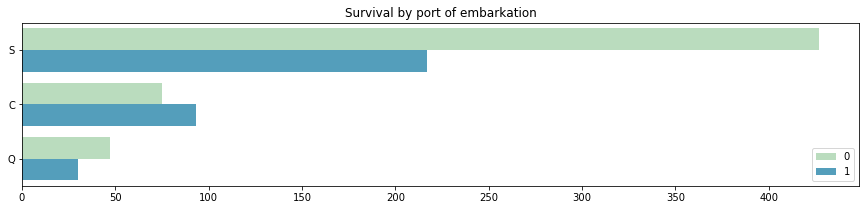

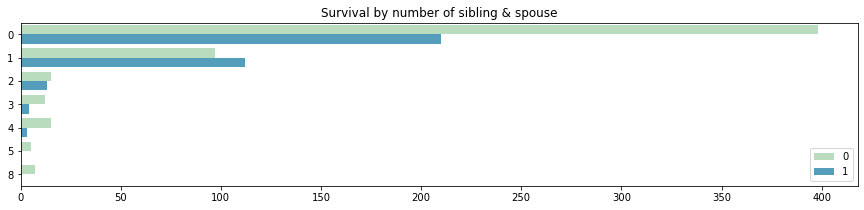

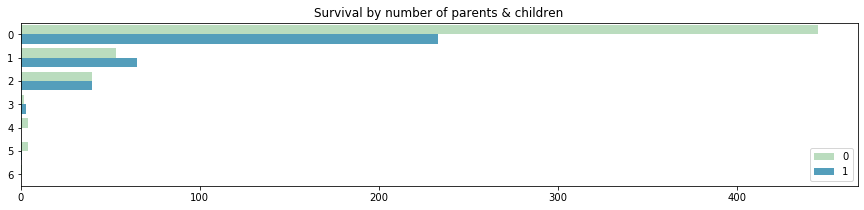

In [25]:
title = [
         'Survival by gender', 'Survival by class', 'Survival by port of embarkation',
         'Survival by number of sibling & spouse', 'Survival by number of parents & children'
        ]
group = ['sex', 'pclass', 'embarked', 'sibsp', 'parch']
for i,g in enumerate(group):
    survived(df, g, title[i])

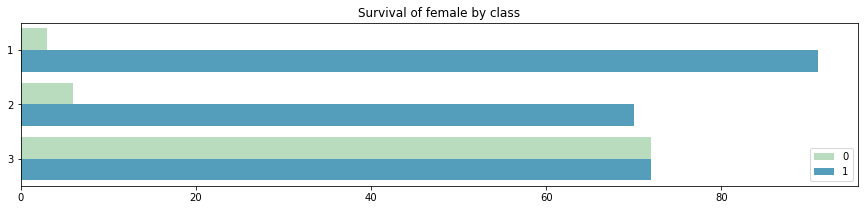

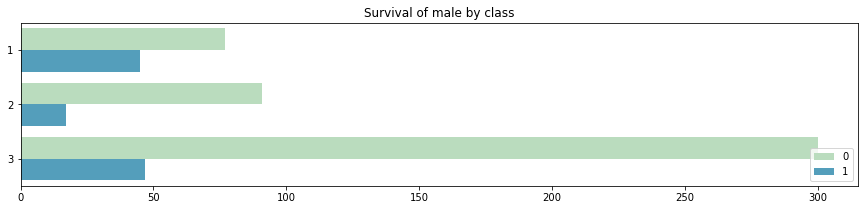

In [26]:
survived(df[df['sex']=='female'],'pclass', 'Survival of female by class')
survived(df[df['sex']=='male'],'pclass', 'Survival of male by class')

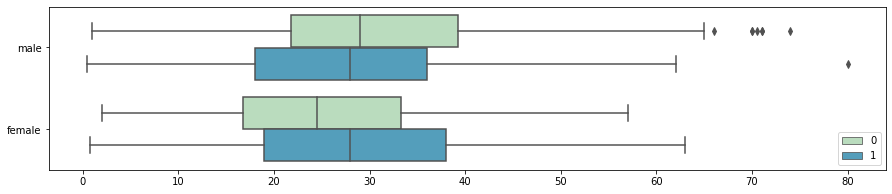

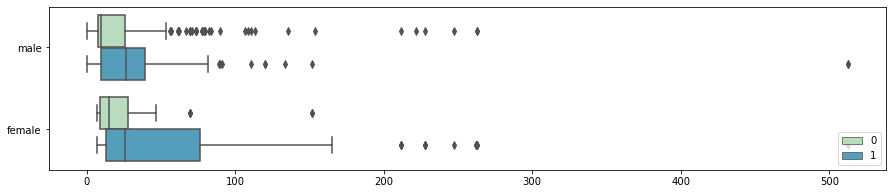

In [27]:
for p in ['age', 'fare']:
    plt.figure(figsize=(15, 3))
    sns.boxplot(y='sex', x=p, hue='survived', data = df, palette='GnBu').legend(loc='lower right')
#     plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig('./img/Survival by '+p+'_boxplot.png')
    plt.show()

